<a href="https://colab.research.google.com/github/Bhuvan068/Tech-Smashers/blob/main/RQI(Square_root_ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile, os

# Mount Google Drive
drive.mount('/content/drive')

# Paths to your two dataset zip files
zip_path1 = '/content/drive/MyDrive/lane marking.v1i.yolov11.zip'
zip_path2 = '/content/drive/MyDrive/road potholes and cracks.v2i.yolov11.zip'

# Create dataset folder
os.makedirs('/content/dataset', exist_ok=True)

# Extract both zip files
for zp in [zip_path1, zip_path2]:
    print(f"Extracting {os.path.basename(zp)} ...")
    with zipfile.ZipFile(zp, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')
    print(f"Extracted: {os.path.basename(zp)}\n")

print("All datasets extracted successfully!")




Mounted at /content/drive
Extracting lane marking.v1i.yolov11.zip ...
Extracted: lane marking.v1i.yolov11.zip

Extracting road potholes and cracks.v2i.yolov11.zip ...
Extracted: road potholes and cracks.v2i.yolov11.zip

All datasets extracted successfully!


In [ ]:
!ls /content/dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!ls "/content/dataset"


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
import os, shutil, yaml
from pathlib import Path

base = Path("/content/dataset")
merged = base / "merged_dataset"

# Create final YOLO folders
for sub in ["images/train", "images/val", "labels/train", "labels/val"]:
    (merged / sub).mkdir(parents=True, exist_ok=True)

# Copy all data from existing folders (train + valid) into merged dataset
for split in ["train", "valid"]:
    img_dir = base / split / "images"
    lbl_dir = base / split / "labels"

    if not img_dir.exists():
        print(f"Missing folder: {img_dir}")
        continue

    dest_split = "train" if split == "train" else "val"

    for img_file in img_dir.glob("*.*"):
        shutil.copy(img_file, merged / f"images/{dest_split}" / img_file.name)

    for lbl_file in lbl_dir.glob("*.txt"):
        shutil.copy(lbl_file, merged / f"labels/{dest_split}" / lbl_file.name)

print("Merged dataset created successfully at:", merged)


Merged dataset created successfully at: /content/dataset/merged_dataset


In [ ]:
final_yaml = {
    "train": str((merged / "images/train").resolve()),
    "val": str((merged / "images/val").resolve()),
    "nc": 2,  # number of classes
    "names": ["lane_marking", "pothole"]
}

with open(merged / "data.yaml", "w") as f:
    yaml.dump(final_yaml, f)

print("New data.yaml created at:", merged / "data.yaml")
print(open(merged / "data.yaml").read())


New data.yaml created at: /content/dataset/merged_dataset/data.yaml
names:
- lane_marking
- pothole
nc: 2
train: /content/dataset/merged_dataset/images/train
val: /content/dataset/merged_dataset/images/val



In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.train(
    data="/content/dataset/merged_dataset/data.yaml",
    epochs=100,
    imgsz=640,
    batch=6,
    workers=2,
    name="yolov11L_pothole_lane_crack",
    project='/content/drive/MyDrive/RQI'
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/merged_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11L_pothole_lane_crack6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e81a83c19d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
!cat /content/dataset/merged_dataset/data.yaml
!ls /content/dataset/merged_dataset/images/train | head
!ls /content/dataset/merged_dataset/labels/train | head


names:
- lane_marking
- pothole
nc: 2
train: /content/dataset/merged_dataset/images/train
val: /content/dataset/merged_dataset/images/val
01362_jpg.rf.2cd2027001e564b30ae5c22c906dbddf.jpg
01362_jpg.rf.3202deab1724514cdda193cf3c7aabfa.jpg
01362_jpg.rf.eec39e137f71b1630d0ae8c8f2af5867.jpg
05349_jpg.rf.1f95c9364b7056a3d8246642dabd038c.jpg
05349_jpg.rf.4b686f6be9aeb02207b66034fad558c0.jpg
05349_jpg.rf.7840cf89410155ac3c2ee29f6a1d7872.jpg
05349_jpg.rf.82483bc259fff3b93ee7805585fae90b.jpg
05349_jpg.rf.b1ae9e6237afa595946d7447be35b49e.jpg
05349_jpg.rf.c7a2dcc7fd5b3f0e00f81a5d190b26f0.jpg
10_jpg.rf.008697de138ebb3541b68ad72703aa7e.jpg
01362_jpg.rf.2cd2027001e564b30ae5c22c906dbddf.txt
01362_jpg.rf.3202deab1724514cdda193cf3c7aabfa.txt
01362_jpg.rf.eec39e137f71b1630d0ae8c8f2af5867.txt
05349_jpg.rf.1f95c9364b7056a3d8246642dabd038c.txt
05349_jpg.rf.4b686f6be9aeb02207b66034fad558c0.txt
05349_jpg.rf.7840cf89410155ac3c2ee29f6a1d7872.txt
05349_jpg.rf.82483bc259fff3b93ee7805585fae90b.txt
05349_jpg.rf.b1

In [ ]:
metrics = model.val()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1560.7±1161.0 MB/s, size: 137.0 KB)
val: Scanning /content/dataset/merged_dataset/labels/val.cache... 422 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 422/422 595.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 5.7it/s 4.7s
                   all        422       1028      0.879      0.768      0.834      0.699
          lane_marking        281        722      0.803      0.571      0.676      0.479
               pothole        140        306      0.955      0.965      0.991       0.92
Speed: 1.1ms preprocess, 5.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/runs/detect/val


In [ ]:
metrics = model.val(
    data="/content/dataset/merged_dataset/data.yaml",
    project="/content/drive/MyDrive/RQI",
    name="val_yolov11L_tuned"
)
print(metrics)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1148.4±380.8 MB/s, size: 122.8 KB)
val: Scanning /content/dataset/merged_dataset/labels/val.cache... 422 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 422/422 592.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 5.6it/s 4.9s
                   all        422       1028      0.879      0.768      0.834      0.699
          lane_marking        281        722      0.803      0.571      0.676      0.479
               pothole        140        306      0.955      0.965      0.991       0.92
Speed: 1.2ms preprocess, 4.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/RQI/val_yolov11L_tuned2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusio

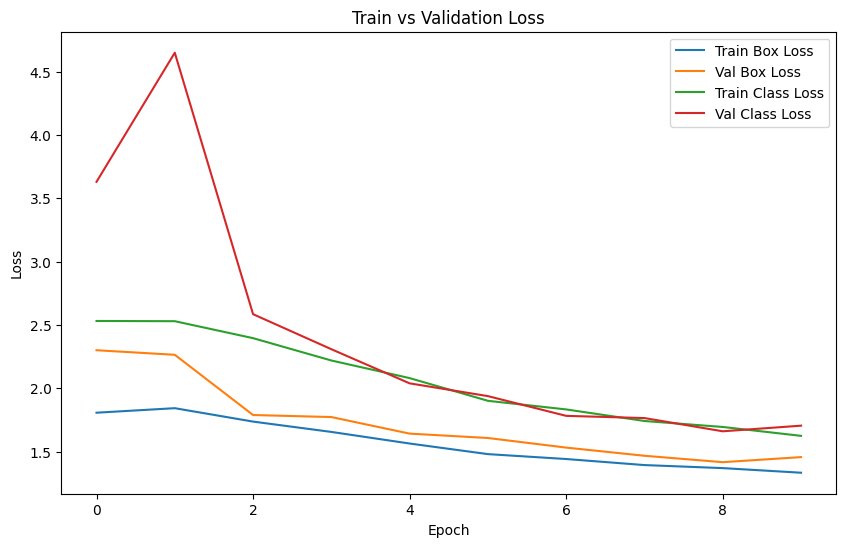

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to results.csv
csv_path = "/content/drive/MyDrive/RQI/yolov11L_pothole_lane_crack/results.csv"

# Read CSV
df = pd.read_csv(csv_path)

# Plot losses
plt.figure(figsize=(10,6))
plt.plot(df['train/box_loss'], label='Train Box Loss')
plt.plot(df['val/box_loss'], label='Val Box Loss')
plt.plot(df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['val/cls_loss'], label='Val Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()


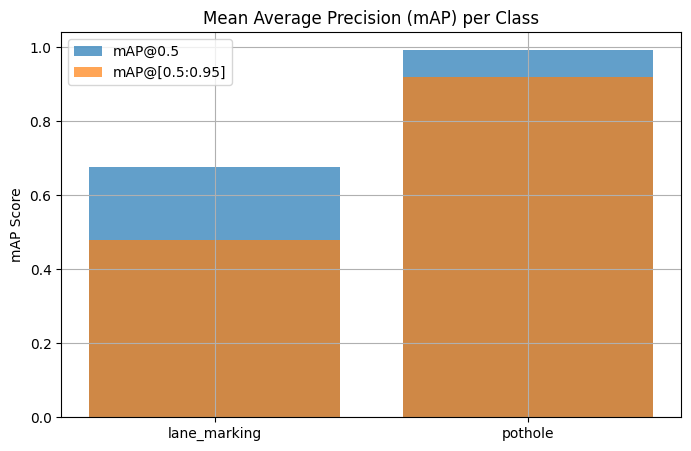

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract available metrics
class_names = list(metrics.names.values())
map50_all = metrics.box.ap50
map5095_all = metrics.box.ap

# Ensure lengths match class count
n_classes = len(class_names)
map50_all = np.array(map50_all)
map5095_all = np.array(map5095_all)

# If any metric arrays are shorter, pad with zeros
if len(map50_all) < n_classes:
    map50_all = np.pad(map50_all, (0, n_classes - len(map50_all)))
if len(map5095_all) < n_classes:
    map5095_all = np.pad(map5095_all, (0, n_classes - len(map5095_all)))

# Plot per-class mAP
plt.figure(figsize=(8, 5))
plt.bar(class_names, map50_all, alpha=0.7, label="mAP@0.5")
plt.bar(class_names, map5095_all, alpha=0.7, label="mAP@[0.5:0.95]")
plt.title("Mean Average Precision (mAP) per Class")
plt.ylabel("mAP Score")
plt.legend()
plt.grid(True)
plt.show()


Saving 269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg to 269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg
Uploaded: 269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg
Image loaded successfully!

image 1/1 /content/269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg: 640x640 1 pothole, 12.0ms
Speed: 2.2ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


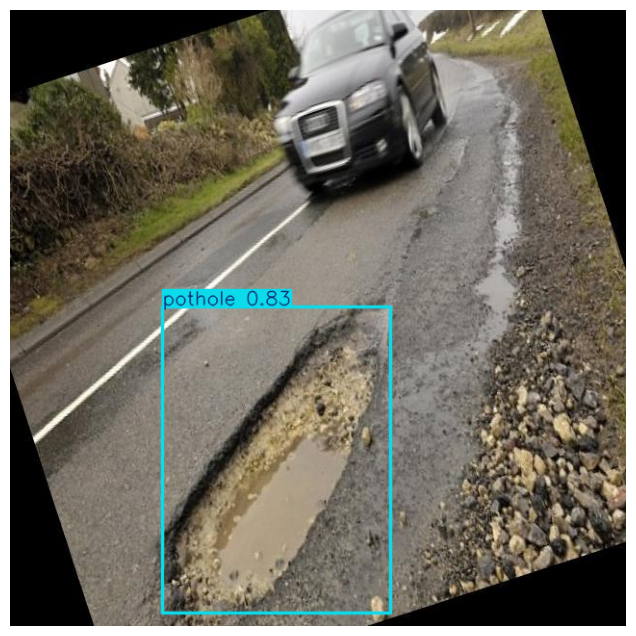

Detected boxes:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.8319], device='cuda:0')
data: tensor([[158.1108, 308.9843, 395.0120, 626.7359,   0.8319,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[276.5614, 467.8601, 236.9012, 317.7516]], device='cuda:0')
xywhn: tensor([[0.4321, 0.7310, 0.3702, 0.4965]], device='cuda:0')
xyxy: tensor([[158.1108, 308.9843, 395.0120, 626.7359]], device='cuda:0')
xyxyn: tensor([[0.2470, 0.4828, 0.6172, 0.9793]], device='cuda:0')


In [ ]:
from google.colab import files
import cv2
from matplotlib import pyplot as plt
from IPython.display import Video, display
import os

uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)

ext = filename.split('.')[-1].lower()

if ext in ['jpg', 'jpeg', 'png']:
    img = cv2.imread(filename)
    if img is None:
        print("Error loading image!")
    else:
        print("Image loaded successfully!")
        results = model.predict(filename, conf=0.4)
        result = results[0] if isinstance(results, list) else results
        img_with_boxes = result.plot()
        img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8,8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
        print("Detected boxes:")
        print(result.boxes)

elif ext in ['mp4', 'mov', 'avi', 'mkv']:
    print("Processing video with YOLO...")
    output_path = "detected_" + filename
    results = model.predict(
        source=filename,
        conf=0.4,
        save=True,
        save_txt=False,
        project="/content",
        name="video_output",
        exist_ok=True
    )
    result_dir = os.path.join("/content", "video_output")
    for f in os.listdir(result_dir):
        if f.endswith(".mp4"):
            output_path = os.path.join(result_dir, f)
            break
    print("Detection complete! Showing result ↓")
    display(Video(output_path, embed=True))

else:
    print("Unsupported file type! Please upload an image or video.")
